In [ ]:
!bash FOML/Assignment_2/gdata.sh

--2023-11-13 06:28:13--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  8.11MB/s    in 24s     

2023-11-13 06:28:38 (7.18 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2023-11-13 06:28:38--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  9.72MB/s    in 7.5s    

2023-11-13 06:28:45 (8.19 MB/s) - ‘test_32x32.mat’ saved [64275384/64

In [ ]:
import numpy as np
import sklearn as sk

# read .mat files
import scipy.io as sio
train = sio.loadmat('../data/train_32x32.mat')
test = sio.loadmat('../data/test_32x32.mat')

# extract data and labels
train_data: np.ndarray = train['X']
train_labels: np.ndarray = train['y']
test_data: np.ndarray = test['X']
test_labels: np.ndarray = test['y']

In [ ]:
from sklearn.decomposition import PCA
trd_reshape = train_data.reshape(3072, train_data.shape[3]).T
ted_reshape = test_data.reshape(3072, test_data.shape[3]).T

def train_pca(i) -> (PCA, np.ndarray, np.ndarray):
    pca = PCA(n_components=i)
    pca.fit(trd_reshape)
    train_data_pca = pca.transform(trd_reshape)
    test_data_pca = pca.transform(ted_reshape)
    return pca, train_data_pca, test_data_pca


In [ ]:
tr_pca_1 = None
te_pca_1 = None
k = False
with open('pca.csv', 'w') as f:
    print('v', file=f)
    for i in range(1, 33):
        pca, tr, te = train_pca(i)
        u = sum(pca.explained_variance_ratio_)
        if u >= 0.9 and not k:
            tr_pca_1 = tr
            te_pca_1 = te
            k = True
        print(u)
        print(u, file=f)

0.5791350775427437
0.6362434099335922
0.6890545127776924
0.7295694415561871
0.7512304567906122
0.7691417090450255
0.7845816463497894
0.7994565924920889
0.8119170428430404
0.8233009712082142
0.8324723306047922
0.8409379600479033
0.8481771319013921
0.8536905464054477
0.8589926102388307
0.8641438411739347
0.8689980322219129
0.8732245123995886
0.8773146491639381
0.8810694245819465
0.8846887537895457
0.8881204144549831
0.89138679744287
0.8945309921457352
0.8975831150605803
0.9005704110407444
0.9033658613920114
0.9061033515744442
0.9086940983803489
0.9111951965225131
0.9136777203615194
0.916000879835855


In [ ]:
train_data.shape[3]

73257

PoV = 0.901 > 0.9 achieved at 26 dimensions


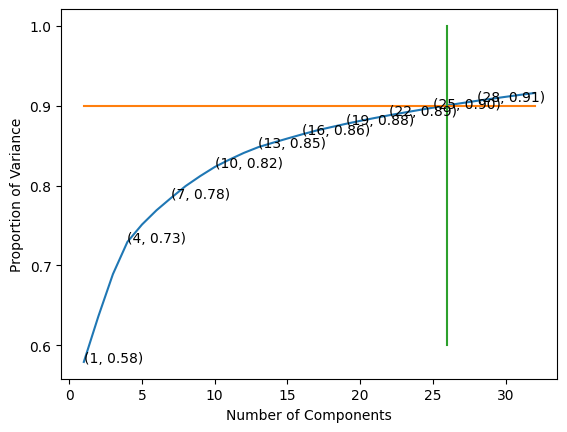

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('pca.csv')

plt.plot(range(1, 33), df['v'])
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance') #for each component
v = 0
for i in range(1, 33, 3):
    plt.annotate(f'({i}, {df["v"][i-1]:.2f})', (i, df['v'][i-1]))
    if df['v'][i-1] >= 0.9:
        v = i
        break

plt.plot(np.linspace(1, 32, 320), [0.9] * 320)
plt.plot([v - 2] * 320, np.linspace(0.6, 1.0, 320))
print(f'PoV = {df["v"][25]:.3f} > 0.9 achieved at 26 dimensions')
plt.show()

In [ ]:
pca, tr_pca_2, te_pca_2 = train_pca(10)

In [30]:
print(pca.components_)
print(pca.explained_variance_)

[[ 0.0175361   0.01820365  0.01876029 ...  0.01695385  0.01756518
   0.01805227]
 [ 0.01909275  0.02145568  0.02094557 ... -0.01947351 -0.02131272
  -0.02016714]
 [-0.01831693 -0.01426355 -0.00251158 ... -0.01803384 -0.01372899
  -0.00148765]
 ...
 [-0.02583105 -0.02121534 -0.0166943  ...  0.00746597  0.01371304
   0.01832122]
 [ 0.00784932  0.00933217  0.00781493 ...  0.02507103  0.02734555
   0.02488805]
 [ 0.00365465  0.00446758  0.00506228 ... -0.01611769 -0.01682026
  -0.0169191 ]]
[4564213.36553624  450075.68025025  416208.84452809  319301.63895299
  170712.3244289   141160.12103022  121683.47335089  117230.72997527
   98201.88638588   89717.71243866]


In [28]:
zipped = list(zip(tr_pca_2, train_labels))
srt = sorted(zipped, key=lambda x: x[1])
# print(srt[0])
x = -1
for i in srt:
    if i[1] != x:
        print(list(i[0]))
        x = i[1]

[-2851.858760886542, -304.0618725275586, -340.74861684032123, 668.0064625848454, 178.6359197406662, -41.79879032741543, -346.5548381697081, 260.75902024943366, 343.4488144292252, 112.35739730839177]
[3857.5288746108095, -443.666525062229, 2121.7112648038246, 832.0778599886327, -780.6836708608528, 442.2704305879117, -399.97764155561913, 514.1477940685678, -318.8247973216679, -317.0017786027148]
[4029.986805195063, 219.81106737191013, 2093.2923825826915, 1086.8746666173688, -941.3899351840881, -605.2022495353264, 631.6611423817513, 787.9841735874377, 195.63217898622747, -254.08329928677523]
[2908.55152341172, 252.57967210214807, -166.95711981273809, 364.9473752702972, -196.2942669340845, -285.7043338289196, -49.95503340698828, -26.861800360002036, 77.09660325047503, -540.1968130941116]
[700.5033864157281, 236.54488729943085, -111.94405854371763, 234.4025127689788, -396.2575465856385, 116.21387213840724, 170.67283157021186, 152.83638361251184, 202.93579893344838, -69.61216769116858]
[-129

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def knn(k) -> (float, float, float):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trd_reshape, train_labels)
    x = accuracy_score(test_labels, knn.predict(ted_reshape))
    knn.fit(tr_pca_1, train_labels)
    y = accuracy_score(test_labels, knn.predict(te_pca_1))
    knn.fit(tr_pca_2, train_labels)
    z = accuracy_score(test_labels, knn.predict(te_pca_2))
    return (x, y, z)

(knn(5), knn(7))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

((0.4683082360172096, 0.4596650276582667, 0.4596650276582667),
 (0.4751459741856177, 0.46819299323909036, 0.46819299323909036))